# Análisis de Auditoría de Normalización

Este notebook permite visualizar y analizar el reporte de auditoría que compara los datos CSV originales con los Parquets normalizados.


## 1. Importar librerías


In [1]:
import polars as pl
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline


## 2. Cargar datos de auditoría


In [2]:
# Cargar reporte de auditoría
audit_path = Path("full_audit.csv")
df = pl.read_csv(audit_path)

print(f"Archivos auditados: {len(df)}")
print(f"\nColumnas: {list(df.columns)}")
print(f"\nPrimeras filas:")
df.head(10)


Archivos auditados: 757

Columnas: ['file', 'boxes_csv', 'boxes_parquet', 'delta_boxes', 'kilos_csv', 'kilos_parquet', 'delta_kilos', 'rows_csv', 'rows_parquet', 'status']

Primeras filas:


file,boxes_csv,boxes_parquet,delta_boxes,kilos_csv,kilos_parquet,delta_kilos,rows_csv,rows_parquet,status
str,i64,i64,i64,f64,f64,f64,i64,i64,str
"""datos_semana_1000.csv""",13632156,13632156,0,6.8398511e7,6.8398511e7,0.0,4847,4847,"""OK"""
"""datos_semana_1001.csv""",11225660,11225660,0,6.0563356e7,6.0563356e7,0.0,4349,4349,"""OK"""
"""datos_semana_1002.csv""",12269389,12269389,0,8.0167958e7,8.0167958e7,0.0,4744,4744,"""OK"""
"""datos_semana_1003.csv""",9738877,9738877,0,7.351781e7,7.351781e7,0.0,3979,3979,"""OK"""
"""datos_semana_1004.csv""",8536542,8536542,0,7.512143e7,7.512143e7,0.0,3537,3537,"""OK"""
"""datos_semana_1005.csv""",11350883,11350883,0,9.4399016e7,9.4399016e7,0.0,4190,4190,"""OK"""
"""datos_semana_1006.csv""",7961091,7961091,0,6.9005213e7,6.9005213e7,0.0,3473,3473,"""OK"""
"""datos_semana_1007.csv""",7248019,7248019,0,5.7725424e7,5.7725424e7,0.0,3065,3065,"""OK"""
"""datos_semana_1008.csv""",7125250,7125250,0,5.1846411e7,5.1846411e7,0.0,2938,2938,"""OK"""


## 3. Resumen estadístico


In [3]:
# Contar archivos por status
status_counts = df.group_by("status").agg(pl.count().alias("count"))
print("Distribución por status:")
print(status_counts)

# Totales globales
total_boxes_csv = df["boxes_csv"].sum()
total_boxes_parquet = df["boxes_parquet"].sum()
total_kilos_csv = df["kilos_csv"].sum()
total_kilos_parquet = df["kilos_parquet"].sum()

print(f"\n{'='*60}")
print("TOTALES GLOBALES")
print(f"{'='*60}")
print(f"Boxes CSV:     {total_boxes_csv:,.0f}")
print(f"Boxes Parquet: {total_boxes_parquet:,.0f}")
print(f"Delta:         {total_boxes_parquet - total_boxes_csv:,.0f}")
print(f"\nKilos CSV:     {total_kilos_csv:,.2f}")
print(f"Kilos Parquet: {total_kilos_parquet:,.2f}")
print(f"Delta:         {total_kilos_parquet - total_kilos_csv:,.2f}")


Distribución por status:
shape: (1, 2)
┌────────┬───────┐
│ status ┆ count │
│ ---    ┆ ---   │
│ str    ┆ u32   │
╞════════╪═══════╡
│ OK     ┆ 757   │
└────────┴───────┘

TOTALES GLOBALES
Boxes CSV:     5,144,111,652
Boxes Parquet: 5,144,111,652
Delta:         0

Kilos CSV:     25,412,581,716.00
Kilos Parquet: 25,412,581,716.00
Delta:         0.00


/var/folders/yr/jbsc0qr14pb7sr4lw62j7vkm0000gn/T/ipykernel_10013/4128033560.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  status_counts = df.group_by("status").agg(pl.count().alias("count"))


## 4. Análisis de discrepancias


In [4]:
# Archivos con discrepancias
warnings = df.filter(pl.col("status") == "WARNING")

if len(warnings) > 0:
    print(f"Archivos con WARNING: {len(warnings)}")
    print("\nPeores discrepancias en Boxes:")
    worst_boxes = warnings.sort("delta_boxes", descending=True).head(10)
    print(worst_boxes.select(["file", "boxes_csv", "boxes_parquet", "delta_boxes"]))
    
    print("\nPeores discrepancias en Kilos:")
    worst_kilos = warnings.sort("delta_kilos", descending=True).head(10)
    print(worst_kilos.select(["file", "kilos_csv", "kilos_parquet", "delta_kilos"]))
else:
    print("✓ No hay discrepancias. Todos los archivos están OK.")


✓ No hay discrepancias. Todos los archivos están OK.


## 5. Visualizaciones


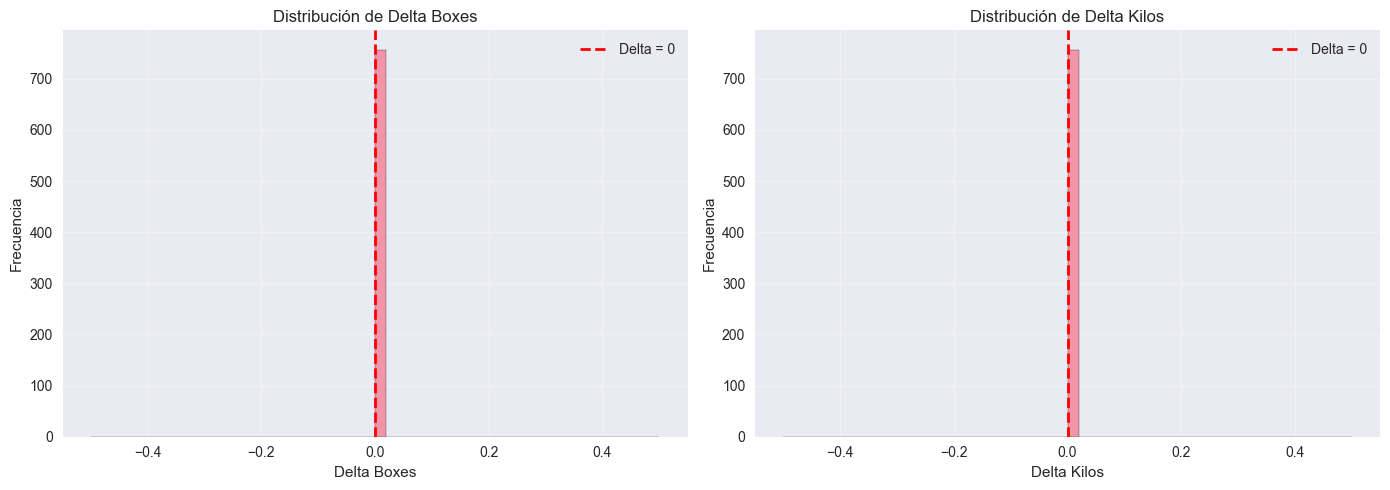

In [5]:
# Convertir a Pandas para visualización (si es necesario)
df_pandas = df.to_pandas()

# Gráfico de distribución de deltas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Delta de boxes
axes[0].hist(df_pandas["delta_boxes"], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Delta = 0')
axes[0].set_xlabel('Delta Boxes')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Delta Boxes')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Delta de kilos
axes[1].hist(df_pandas["delta_kilos"], bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Delta = 0')
axes[1].set_xlabel('Delta Kilos')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Delta Kilos')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


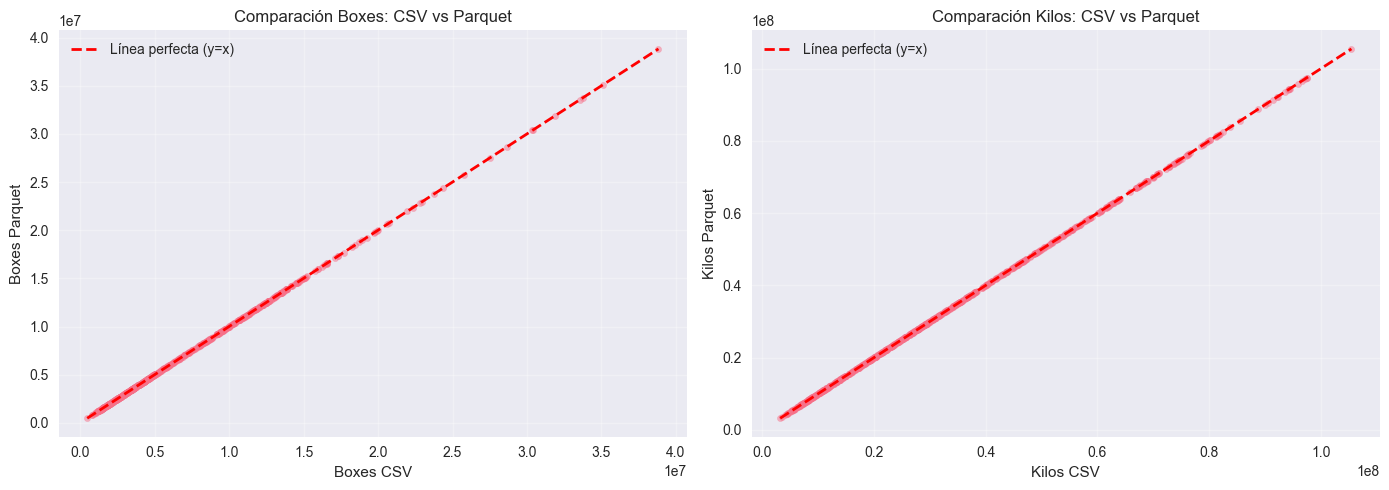

In [6]:
# Comparación CSV vs Parquet (scatter plot)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxes
axes[0].scatter(df_pandas["boxes_csv"], df_pandas["boxes_parquet"], alpha=0.5, s=20)
axes[0].plot([df_pandas["boxes_csv"].min(), df_pandas["boxes_csv"].max()], 
             [df_pandas["boxes_csv"].min(), df_pandas["boxes_csv"].max()], 
             'r--', linewidth=2, label='Línea perfecta (y=x)')
axes[0].set_xlabel('Boxes CSV')
axes[0].set_ylabel('Boxes Parquet')
axes[0].set_title('Comparación Boxes: CSV vs Parquet')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Kilos
axes[1].scatter(df_pandas["kilos_csv"], df_pandas["kilos_parquet"], alpha=0.5, s=20)
axes[1].plot([df_pandas["kilos_csv"].min(), df_pandas["kilos_csv"].max()], 
             [df_pandas["kilos_csv"].min(), df_pandas["kilos_csv"].max()], 
             'r--', linewidth=2, label='Línea perfecta (y=x)')
axes[1].set_xlabel('Kilos CSV')
axes[1].set_ylabel('Kilos Parquet')
axes[1].set_title('Comparación Kilos: CSV vs Parquet')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


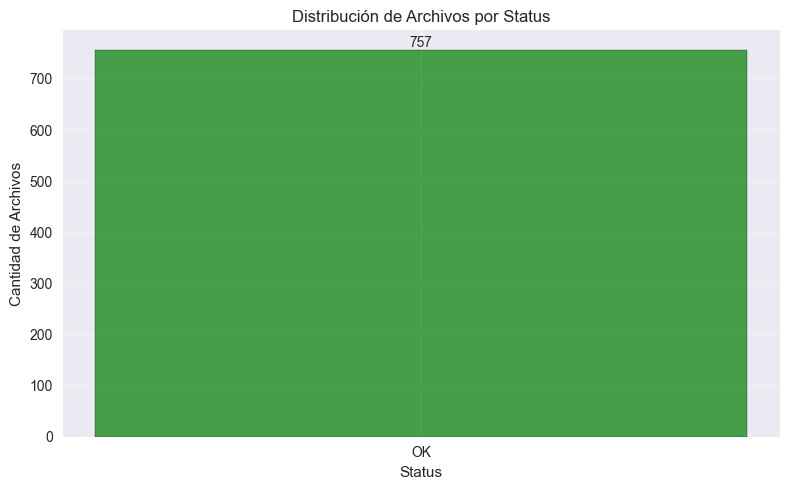

In [7]:
# Gráfico de barras: Status
status_counts_pd = status_counts.to_pandas()

plt.figure(figsize=(8, 5))
bars = plt.bar(status_counts_pd["status"], status_counts_pd["count"], 
               color=['green' if s == 'OK' else 'orange' for s in status_counts_pd["status"]],
               edgecolor='black', alpha=0.7)
plt.xlabel('Status')
plt.ylabel('Cantidad de Archivos')
plt.title('Distribución de Archivos por Status')
plt.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [8]:
import os
import glob

def sum_totals_from_folder(folder, file_pattern, filetype='csv'):
    """
    Sumar totales de boxes y kilos desde una carpeta.
    
    Args:
        folder: Ruta a la carpeta
        file_pattern: Patrón de archivos (ej: '*.csv')
        filetype: 'csv' o 'parquet'
    
    Returns:
        Tupla (total_boxes, total_kilos)
    """
    total_boxes = 0
    total_kilos = 0.0
    files = glob.glob(os.path.join(folder, file_pattern))
    
    print(f"Procesando {len(files)} archivos...")
    
    for f in files:
        try:
            if filetype == 'csv':
                df = pl.read_csv(f, ignore_errors=True)
                # En CSVs: "Boxes" y "Kilograms"
                if "Boxes" in df.columns and "Kilograms" in df.columns:
                    # Remover separadores de miles "." y convertir a numérico
                    boxes_series = (
                        pl.col("Boxes")
                        .cast(pl.Utf8)
                        .str.replace_all(r'\.', '')
                        .str.strip_chars()
                        .cast(pl.Int64, strict=False)
                    )
                    kilos_series = (
                        pl.col("Kilograms")
                        .cast(pl.Utf8)
                        .str.replace_all(r'\.', '')
                        .str.strip_chars()
                        .cast(pl.Float64, strict=False)
                    )
                    df_processed = df.with_columns([
                        boxes_series.alias("boxes_clean"),
                        kilos_series.alias("kilos_clean")
                    ])
                    total_boxes += df_processed["boxes_clean"].sum() or 0
                    total_kilos += df_processed["kilos_clean"].sum() or 0.0
            elif filetype == 'parquet':
                df = pl.read_parquet(f)
                # En Parquets: "boxes" y "net_weight_kg"
                if "boxes" in df.columns and "net_weight_kg" in df.columns:
                    total_boxes += df["boxes"].sum() or 0
                    total_kilos += df["net_weight_kg"].sum() or 0.0
        except Exception as e:
            print(f"  ⚠️  Error procesando {os.path.basename(f)}: {e}")
            continue
    
    return total_boxes, total_kilos

# Sumar totales de data_raw (CSV)
raw_folder = '../data_raw'
raw_boxes, raw_kilos = sum_totals_from_folder(raw_folder, '*.csv', filetype='csv')
print(f"\nTotal cajas (data_raw): {raw_boxes:,.0f}")
print(f"Total kilos (data_raw): {raw_kilos:,.2f}")

# Sumar totales de data_clean (Parquet)
clean_folder = '../data_clean'
clean_boxes, clean_kilos = sum_totals_from_folder(clean_folder, '*.parquet', filetype='parquet')
print(f"\nTotal cajas (data_clean): {clean_boxes:,.0f}")
print(f"Total kilos (data_clean): {clean_kilos:,.2f}")

# Comparar
delta_boxes = clean_boxes - raw_boxes
delta_kilos = clean_kilos - raw_kilos
print(f"\n{'='*60}")
print("COMPARACIÓN")
print(f"{'='*60}")
print(f"Diferencia cajas: {delta_boxes:,.0f}")
print(f"Diferencia kilos: {delta_kilos:,.2f}")
print(f"Match perfecto: {'✓ SÍ' if delta_boxes == 0 and delta_kilos == 0 else '✗ NO'}")

Procesando 757 archivos...

Total cajas (data_raw): 5,144,111,652
Total kilos (data_raw): 25,412,581,716.00
Procesando 757 archivos...

Total cajas (data_clean): 5,144,111,652
Total kilos (data_clean): 25,412,581,716.00

COMPARACIÓN
Diferencia cajas: 0
Diferencia kilos: 0.00
Match perfecto: ✓ SÍ


## 8. Análisis de Warnings del Reporte de Validación

Este apartado analiza los warnings detectados en el reporte de validación final y propone soluciones.


In [9]:
# Cargar reporte de validación
import json

validation_path = Path("final_validation.json")

if not validation_path.exists():
    print("⚠️  No se encontró final_validation.json")
    print("Ejecuta primero: python scripts/validate.py")
else:
    with open(validation_path, 'r', encoding='utf-8') as f:
        validation_report = json.load(f)
    
    print("="*60)
    print("REPORTE DE VALIDACIÓN")
    print("="*60)
    print(f"Total filas: {validation_report['total_rows']:,}")
    print(f"Schema OK: {validation_report['schema_ok']}")
    print(f"Tipos OK: {validation_report['types_ok']}")
    print(f"Totales match CSV: {validation_report['totals_match_csv']}")
    print(f"Duplicados: {validation_report['duplicates']:,}")
    print(f"\nWarnings: {len(validation_report['warnings'])}")
    for warning in validation_report['warnings']:
        print(f"  ⚠️  {warning}")
    print("="*60)


REPORTE DE VALIDACIÓN
Total filas: 1,754,553
Schema OK: True
Tipos OK: True
Totales match CSV: True
Duplicados: 151,301

Warnings: 3
  ⚠️  Columna requerida 'country' tiene 1 valores nulos
  ⚠️  Columna requerida 'exporter' tiene 13154 valores nulos
  ⚠️  Filas duplicadas: 151301


### 8.1. Análisis de Valores Nulos


In [10]:
# Cargar dataset maestro para análisis
master_df = pl.read_parquet("../data/exports_10_years.parquet")

# Analizar valores nulos
print("ANÁLISIS DE VALORES NULOS")
print("="*60)

missing_values = validation_report['missing_values']
required_columns = ["season", "week", "year", "country", "product", "exporter"]

print("\nColumnas requeridas con nulos:")
for col in required_columns:
    null_count = missing_values.get(col, 0)
    if null_count > 0:
        pct = (null_count / len(master_df)) * 100
        print(f"  {col}: {null_count:,} nulos ({pct:.2f}%)")

# Mostrar ejemplos de filas con nulos en columnas requeridas
print("\n" + "="*60)
print("EJEMPLOS DE FILAS CON NULOS EN COLUMNAS REQUERIDAS")
print("="*60)

for col in required_columns:
    null_count = missing_values.get(col, 0)
    if null_count > 0:
        print(f"\n{col.upper()} - Filas con nulos ({null_count:,}):")
        null_rows = master_df.filter(pl.col(col).is_null())
        # Incluir source_week si existe para identificar el archivo original
        if "source_week" in null_rows.columns:
            # Mostrar source_week primero para fácil identificación
            display_cols = ["source_week", "season", "week", "year", "country", "product", "exporter", "boxes"]
            available_cols = [c for c in display_cols if c in null_rows.columns]
            print(null_rows.head(10).select(available_cols))
            # Mostrar lista de archivos CSV a revisar
            source_weeks = null_rows["source_week"].unique().sort().to_list()
            print(f"\n  📁 Archivos CSV a revisar ({len(source_weeks)} archivos):")
            print(f"     datos_semana_{source_weeks[:20]}")
            if len(source_weeks) > 20:
                print(f"     ... y {len(source_weeks) - 20} archivos más")
        else:
            # Si no hay source_week, mostrar sin él
            display_cols = ["season", "week", "year", "country", "product", "exporter", "boxes"]
            available_cols = [c for c in display_cols if c in null_rows.columns]
            print(null_rows.head(10).select(available_cols))


ANÁLISIS DE VALORES NULOS

Columnas requeridas con nulos:
  country: 1 nulos (0.00%)
  exporter: 13,154 nulos (0.75%)

EJEMPLOS DE FILAS CON NULOS EN COLUMNAS REQUERIDAS

COUNTRY - Filas con nulos (1):
shape: (1, 8)
┌─────────────┬───────────┬──────┬──────┬─────────┬──────────┬────────────────┬───────┐
│ source_week ┆ season    ┆ week ┆ year ┆ country ┆ product  ┆ exporter       ┆ boxes │
│ ---         ┆ ---       ┆ ---  ┆ ---  ┆ ---     ┆ ---      ┆ ---            ┆ ---   │
│ i64         ┆ str       ┆ i64  ┆ i64  ┆ str     ┆ str      ┆ str            ┆ i64   │
╞═════════════╪═══════════╪══════╪══════╪═════════╪══════════╪════════════════╪═══════╡
│ 786         ┆ 2014-2015 ┆ 3    ┆ 2015 ┆ null    ┆ Cherries ┆ Jacusiel Ltda. ┆ 2560  │
└─────────────┴───────────┴──────┴──────┴─────────┴──────────┴────────────────┴───────┘

  📁 Archivos CSV a revisar (1 archivos):
     datos_semana_[786]

EXPORTER - Filas con nulos (13,154):
shape: (10, 8)
┌─────────────┬───────────┬──────┬──────┬────────

### 8.2. Análisis de Filas Duplicadas


In [11]:
# Analizar duplicados
duplicates_count = validation_report['duplicates']
total_rows = validation_report['total_rows']
pct_duplicates = (duplicates_count / total_rows) * 100

print("ANÁLISIS DE DUPLICADOS")
print("="*60)
print(f"Total de filas duplicadas: {duplicates_count:,}")
print(f"Porcentaje del dataset: {pct_duplicates:.2f}%")
print(f"Total de filas únicas si se eliminan duplicados: {total_rows - duplicates_count:,}")

# Encontrar filas duplicadas
duplicate_rows = master_df.filter(master_df.is_duplicated())

print("\n" + "="*60)
print("EJEMPLOS DE FILAS DUPLICADAS")
print("="*60)
print("\nPrimeras 10 filas duplicadas:")
# Incluir source_week si existe para identificar el archivo original
if "source_week" in duplicate_rows.columns:
    # Mostrar source_week primero para fácil identificación
    display_cols = ["source_week", "season", "week", "year", "country", "product", "exporter", "boxes", "net_weight_kg"]
    available_cols = [c for c in display_cols if c in duplicate_rows.columns]
    print(duplicate_rows.head(10).select(available_cols))
else:
    display_cols = ["season", "week", "year", "country", "product", "exporter", "boxes", "net_weight_kg"]
    available_cols = [c for c in display_cols if c in duplicate_rows.columns]
    print(duplicate_rows.head(10).select(available_cols))

# Mostrar distribución de duplicados por archivo de origen
if "source_week" in duplicate_rows.columns:
    print("\n" + "="*60)
    print("DISTRIBUCIÓN DE DUPLICADOS POR ARCHIVO DE ORIGEN")
    print("="*60)
    dup_by_file = (
        duplicate_rows
        .group_by("source_week")
        .agg(pl.count().alias("duplicates_count"))
        .sort("duplicates_count", descending=True)
    )
    print("\nTop 20 archivos con más duplicados:")
    print(dup_by_file.head(20))
    # Mostrar lista de archivos CSV a revisar
    source_weeks = dup_by_file["source_week"].head(20).to_list()
    print(f"\n  📁 Archivos CSV a revisar (Top 20):")
    print(f"     datos_semana_{source_weeks}")

# Analizar qué columnas tienen más variación en duplicados
print("\n" + "="*60)
print("ANÁLISIS DE PATRONES EN DUPLICADOS")
print("="*60)

# Agrupar por todas las columnas y contar duplicados
duplicate_groups = (
    master_df
    .group_by(master_df.columns)
    .agg(pl.count().alias("count"))
    .filter(pl.col("count") > 1)
    .sort("count", descending=True)
)

print(f"\nGrupos de filas completamente duplicadas: {len(duplicate_groups):,}")
print("\nTop 10 grupos con más duplicados:")
print(duplicate_groups.head(10))


ANÁLISIS DE DUPLICADOS
Total de filas duplicadas: 151,301
Porcentaje del dataset: 8.62%
Total de filas únicas si se eliminan duplicados: 1,603,252

EJEMPLOS DE FILAS DUPLICADAS

Primeras 10 filas duplicadas:
shape: (4, 9)
┌─────────────┬───────────┬──────┬──────┬───┬──────────┬─────────────────┬───────┬───────────────┐
│ source_week ┆ season    ┆ week ┆ year ┆ … ┆ product  ┆ exporter        ┆ boxes ┆ net_weight_kg │
│ ---         ┆ ---       ┆ ---  ┆ ---  ┆   ┆ ---      ┆ ---             ┆ ---   ┆ ---           │
│ i64         ┆ str       ┆ i64  ┆ i64  ┆   ┆ str      ┆ str             ┆ i64   ┆ f64           │
╞═════════════╪═══════════╪══════╪══════╪═══╪══════════╪═════════════════╪═══════╪═══════════════╡
│ 1148        ┆ 2021-2022 ┆ 51   ┆ 2021 ┆ … ┆ Cherries ┆ Prize S.A.      ┆ 1800  ┆ 9000.0        │
│ 1148        ┆ 2021-2022 ┆ 51   ┆ 2021 ┆ … ┆ Cherries ┆ Prize S.A.      ┆ 1800  ┆ 9000.0        │
│ 1300        ┆ 2024-2025 ┆ 47   ┆ 2024 ┆ … ┆ Cherries ┆ Snluisde Yaquil ┆ 3312  ┆ 16

/var/folders/yr/jbsc0qr14pb7sr4lw62j7vkm0000gn/T/ipykernel_10013/2951377647.py:38: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("duplicates_count"))
/var/folders/yr/jbsc0qr14pb7sr4lw62j7vkm0000gn/T/ipykernel_10013/2951377647.py:57: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))



Grupos de filas completamente duplicadas: 2

Top 10 grupos con más duplicados:
shape: (2, 16)
┌───────────┬──────┬──────┬──────────┬───┬───────┬───────────────┬─────────────┬───────┐
│ season    ┆ week ┆ year ┆ region   ┆ … ┆ boxes ┆ net_weight_kg ┆ source_week ┆ count │
│ ---       ┆ ---  ┆ ---  ┆ ---      ┆   ┆ ---   ┆ ---           ┆ ---         ┆ ---   │
│ str       ┆ i64  ┆ i64  ┆ str      ┆   ┆ i64   ┆ f64           ┆ i64         ┆ u32   │
╞═══════════╪══════╪══════╪══════════╪═══╪═══════╪═══════════════╪═════════════╪═══════╡
│ 2024-2025 ┆ 47   ┆ 2024 ┆ Far East ┆ … ┆ 3312  ┆ 1656.0        ┆ 1300        ┆ 2     │
│ 2021-2022 ┆ 51   ┆ 2021 ┆ Far East ┆ … ┆ 1800  ┆ 9000.0        ┆ 1148        ┆ 2     │
└───────────┴──────┴──────┴──────────┴───┴───────┴───────────────┴─────────────┴───────┘


In [13]:
import polars as pl
from pathlib import Path

# Inspeccionar columnas del archivo de la semana 1148
file_path = Path('../data_raw/datos_semana_1148.csv')
if file_path.exists():
    df = pl.read_csv(file_path, n_rows=5)
    print(f"Columnas en {file_path.name}:")
    print(df.columns)
else:
    print(f"Archivo no encontrado: {file_path}")

Columnas en datos_semana_1148.csv:
['Season', 'ETD Week', 'Region', 'Market', 'Country', 'Transport', 'Specie', 'Variety', 'Importer', 'Exporter', 'Arrival port', 'Boxes', 'Kilograms']


In [15]:
import polars as pl
from pathlib import Path

# Definir los archivos de origen y patrones de búsqueda
source_weeks = [1148, 1300]
folder = '../data_raw'
patterns = [
    {
        'Season': '2021-2022', 'ETD Week': 51, 'Year': 2021, 'Product': 'Cherries', 'Exporter': 'Prize S.A.', 'Boxes': 1800, 'Kilograms': 9000.0
    },
    {
        'Season': '2024-2025', 'ETD Week': 47, 'Year': 2024, 'Product': 'Cherries', 'Exporter': 'Snluisde Yaquil', 'Boxes': 3312, 'Kilograms': 1656.0
    }
]

for week, pattern in zip(source_weeks, patterns):
    file_path = Path(folder) / f"datos_semana_{week}.csv"
    print(f"\nBuscando duplicados en: {file_path}")
    if not file_path.exists():
        print(f"  ⚠️  Archivo no encontrado: {file_path}")
        continue
    df = pl.read_csv(file_path, ignore_errors=True)
    # Limpiar columnas numéricas
    if 'Boxes' in df.columns:
        df = df.with_columns([
            pl.col('Boxes').cast(pl.Utf8).str.replace_all(r'\.', '').cast(pl.Int64, strict=False).alias('Boxes_clean')
        ])
    if 'Kilograms' in df.columns:
        df = df.with_columns([
            pl.col('Kilograms').cast(pl.Utf8).str.replace_all(r'\.', '').cast(pl.Float64, strict=False).alias('Kilograms_clean')
        ])
    # Revisar nombres de columnas
    print(f"Columnas: {df.columns}")
    # Ajustar nombres de columnas según el archivo
    mask = (
        (df['Season'] == pattern['Season']) &
        (df['ETD Week'] == pattern['ETD Week']) &
        (df['Exporter'] == pattern['Exporter']) &
        (df['Boxes_clean'] == pattern['Boxes']) &
        (df['Kilograms_clean'] == pattern['Kilograms'])
    )
    matches = df.filter(mask)
    print(f"  Filas encontradas: {len(matches)}")
    if len(matches) > 0:
        print(matches)


Buscando duplicados en: ../data_raw/datos_semana_1148.csv
Columnas: ['Season', 'ETD Week', 'Region', 'Market', 'Country', 'Transport', 'Specie', 'Variety', 'Importer', 'Exporter', 'Arrival port', 'Boxes', 'Kilograms', 'Boxes_clean', 'Kilograms_clean']
  Filas encontradas: 0

Buscando duplicados en: ../data_raw/datos_semana_1300.csv
Columnas: ['Season', 'ETD Week', 'Region', 'Market', 'Country', 'Transport', 'Specie', 'Variety', 'Importer', 'Exporter', 'Arrival port', 'Boxes', 'Kilograms', 'Boxes_clean', 'Kilograms_clean']
  Filas encontradas: 0


In [23]:
import polars as pl
from pathlib import Path

# Revisar valores únicos en columnas relevantes para ambos archivos
source_weeks = [1148, 1300]
folder = '../data_raw'

for week in source_weeks:
    file_path = Path(folder) / f"datos_semana_{week}.csv"
    print(f"\nValores únicos en: {file_path}")
    if not file_path.exists():
        print(f"  ⚠️  Archivo no encontrado: {file_path}")
        continue
    df = pl.read_csv(file_path, ignore_errors=True)
    if 'Boxes' in df.columns:
        df = df.with_columns([
            pl.col('Boxes').cast(pl.Utf8).str.replace_all(r'\.', '').cast(pl.Int64, strict=False).alias('Boxes_clean')
        ])
    if 'Kilograms' in df.columns:
        df = df.with_columns([
            pl.col('Kilograms').cast(pl.Utf8).str.replace_all(r'\.', '').cast(pl.Float64, strict=False).alias('Kilograms_clean')
        ])
    for col in ['Season', 'ETD Week', 'Exporter', 'Boxes_clean', 'Kilograms_clean']:
        if col in df.columns:
            print(f"- {col}: {df[col].unique().to_list()}")


Valores únicos en: ../data_raw/datos_semana_1148.csv
- Season: ['2021-2022']
- ETD Week: ['51-2021']
- Exporter: ['Global Andes Ex', 'Frutas Cordillera Sp', 'Sol D Maule Spa', 'Grupo Metro S.a.', 'Quality F.growe', 'Agricom Spa', 'Tyt Export S.a.', 'Aisien Spa', 'Chilfresh Ltda.', 'Agr.la Cruz Lt.', 'Weber Export Sp', 'Exp.agua Santa', 'G B Export Spa', 'Exportadora Cruxagri', 'Alifrut S.a.', 'Copefrut S.a.', 'San Alberto S.a', 'El Refugio', 'Calafate Spa', 'Hortifrut Chile', 'Spreafico Chile Spa', 'Vivoagrochile', 'Nature South Ex', 'Tropical Fruits', 'South 365 Spa', 'I Fruit Spa', 'Entre Andes Ltd', 'Grower Chile', 'Lq Fruit Spa', 'Teno Fruit Spa', 'Agua Fria Ltda.', 'Fruka Spa', 'Mace S.a.', 'Valle Del Sol L', 'Ecofresh Spa', 'Maule Berries L', 'Dole-chile S.a.', 'Geofrut Ltda.', 'Exp.rio King', 'Priagro', 'Agric.la Higuera Lt', 'Agroex Chile', 'South Pacific T', 'Exp.brix Ltda', 'Newdayfruits S.', 'Thomas Fresh Sp', 'Exp.paula Ltda', 'Nature South', 'Soc.packing', 'Queulat Export

In [24]:
import polars as pl
from pathlib import Path

# Buscar la fila duplicada en datos_semana_1148.csv usando coincidencia parcial en 'ETD Week'
file_path = Path('../data_raw/datos_semana_1148.csv')
if file_path.exists():
    df = pl.read_csv(file_path, ignore_errors=True)
    df = df.with_columns([
        pl.col('Boxes').cast(pl.Utf8).str.replace_all(r'\.', '').cast(pl.Int64, strict=False).alias('Boxes_clean'),
        pl.col('Kilograms').cast(pl.Utf8).str.replace_all(r'\.', '').cast(pl.Float64, strict=False).alias('Kilograms_clean')
    ])
    mask = (
        (df['Season'] == '2021-2022') &
        (df['Exporter'] == 'Prize S.a.') &
        (df['Boxes_clean'] == 1800) &
        (df['Kilograms_clean'] == 9000.0) &
        (df['ETD Week'].cast(pl.Utf8).str.contains('51'))
    )
    matches = df.filter(mask)
    print(f"Filas encontradas: {len(matches)}")
    if len(matches) > 0:
        print(matches)
else:
    print(f"Archivo no encontrado: {file_path}")

Filas encontradas: 5
shape: (5, 15)
┌───────────┬──────────┬──────────┬───────────┬───┬───────┬───────────┬─────────────┬──────────────┐
│ Season    ┆ ETD Week ┆ Region   ┆ Market    ┆ … ┆ Boxes ┆ Kilograms ┆ Boxes_clean ┆ Kilograms_cl │
│ ---       ┆ ---      ┆ ---      ┆ ---       ┆   ┆ ---   ┆ ---       ┆ ---         ┆ ean          │
│ str       ┆ str      ┆ str      ┆ str       ┆   ┆ f64   ┆ f64       ┆ i64         ┆ ---          │
│           ┆          ┆          ┆           ┆   ┆       ┆           ┆             ┆ f64          │
╞═══════════╪══════════╪══════════╪═══════════╪═══╪═══════╪═══════════╪═════════════╪══════════════╡
│ 2021-2022 ┆ 51-2021  ┆ Far East ┆ East Asia ┆ … ┆ 180.0 ┆ 900.0     ┆ 1800        ┆ 9000.0       │
│ 2021-2022 ┆ 51-2021  ┆ Far East ┆ East Asia ┆ … ┆ 180.0 ┆ 900.0     ┆ 1800        ┆ 9000.0       │
│ 2021-2022 ┆ 51-2021  ┆ Far East ┆ East Asia ┆ … ┆ 180.0 ┆ 900.0     ┆ 1800        ┆ 9000.0       │
│ 2021-2022 ┆ 51-2021  ┆ Far East ┆ East Asia ┆ … ┆ 180

### 8.3. Soluciones Propuestas


In [ ]:
print("="*60)
print("SOLUCIONES PROPUESTAS")
print("="*60)

# Solución 1: Valores nulos
print("\n1. VALORES NULOS EN COLUMNAS REQUERIDAS")
print("-" * 60)

country_nulls = missing_values.get("country", 0)
exporter_nulls = missing_values.get("exporter", 0)

if country_nulls > 0:
    print(f"\n  Problema: {country_nulls:,} valores nulos en 'country'")
    print("  Soluciones:")
    print("    a) Eliminar filas con country nulo (si es muy pocas)")
    print("    b) Asignar valor por defecto (ej: 'UNKNOWN')")
    print("    c) Intentar inferir país desde otras columnas (port_destination)")
    print("    d) Revisar CSVs originales para corregir en la fuente")

if exporter_nulls > 0:
    print(f"\n  Problema: {exporter_nulls:,} valores nulos en 'exporter' ({exporter_nulls/total_rows*100:.2f}%)")
    print("  Soluciones:")
    print("    a) Eliminar filas con exporter nulo (si no son críticas)")
    print("    b) Asignar valor por defecto (ej: 'UNKNOWN_EXPORTER')")
    print("    c) Revisar CSVs originales para corregir en la fuente")
    print("    d) Considerar hacer 'exporter' opcional si es común que falte")

# Solución 2: Duplicados
print("\n2. FILAS DUPLICADAS")
print("-" * 60)
print(f"\n  Problema: {duplicates_count:,} filas completamente duplicadas ({pct_duplicates:.2f}%)")
print("  Soluciones:")
print("    a) Eliminar duplicados manteniendo solo la primera ocurrencia:")
print("       df_unique = df.unique()")
print("    b) Eliminar duplicados manteniendo solo la última ocurrencia:")
print("       df_unique = df.reverse().unique().reverse()")
print("    c) Analizar si los duplicados son legítimos (mismo producto enviado múltiples veces)")
print("    d) Si son legítimos, mantenerlos pero documentar el motivo")

# Resumen de acciones recomendadas
print("\n" + "="*60)
print("ACCIONES RECOMENDADAS")
print("="*60)
print("\n1. Revisar CSVs originales para identificar origen de nulos y duplicados")
print("2. Decidir política de manejo:")
print("   - ¿Eliminar nulos o asignar valores por defecto?")
print("   - ¿Eliminar duplicados o mantenerlos?")
print("3. Si se decide limpiar, crear script de limpieza:")
print("   - scripts/clean_dataset.py")
print("4. Regenerar dataset maestro después de limpieza")
print("5. Re-ejecutar validación para verificar mejoras")
print("="*60)


### 8.4. Generar Dataset Limpio (Opcional)

Si decides aplicar las soluciones, puedes usar este código para generar un dataset limpio.


In [ ]:
# CÓDIGO DE EJEMPLO PARA LIMPIEZA (NO EJECUTAR AUTOMÁTICAMENTE)
# Descomenta y ajusta según tus necesidades

"""
# Opción 1: Eliminar filas con nulos en columnas requeridas
df_clean = master_df.filter(
    pl.col("country").is_not_null() & 
    pl.col("exporter").is_not_null()
)

# Opción 2: Asignar valores por defecto a nulos
df_clean = master_df.with_columns([
    pl.col("country").fill_null("UNKNOWN").alias("country"),
    pl.col("exporter").fill_null("UNKNOWN_EXPORTER").alias("exporter")
])

# Opción 3: Eliminar duplicados
df_clean = master_df.unique()

# Opción 4: Combinar todas las limpiezas
df_clean = (
    master_df
    .with_columns([
        pl.col("country").fill_null("UNKNOWN").alias("country"),
        pl.col("exporter").fill_null("UNKNOWN_EXPORTER").alias("exporter")
    ])
    .unique()
)

# Guardar dataset limpio
# output_path = Path("../data/exports_10_years_clean.parquet")
# df_clean.write_parquet(output_path, compression="snappy")
# print(f"Dataset limpio guardado: {output_path}")
# print(f"Filas originales: {len(master_df):,}")
# print(f"Filas después de limpieza: {len(df_clean):,}")
# print(f"Filas eliminadas: {len(master_df) - len(df_clean):,}")
"""

print("Código de ejemplo para limpieza disponible en la celda.")
print("Descomenta y ajusta según tus necesidades antes de ejecutar.")


In [22]:
import polars as pl
from pathlib import Path

# Mostrar filas duplicadas con todas las columnas en los archivos de origen
source_weeks = [1148, 1300]
folder = '../data_raw'

for week in source_weeks:
    file_path = Path(folder) / f"datos_semana_{week}.csv"
    print(f"\nDuplicados en: {file_path}")
    if not file_path.exists():
        print(f"  ⚠️  Archivo no encontrado: {file_path}")
        continue
    df = pl.read_csv(file_path, ignore_errors=True)
    df = df.with_columns([
        pl.col('Boxes').cast(pl.Utf8).str.replace_all(r'\.', '').cast(pl.Int64, strict=False).alias('Boxes_clean'),
        pl.col('Kilograms').cast(pl.Utf8).str.replace_all(r'\.', '').cast(pl.Float64, strict=False).alias('Kilograms_clean')
    ])
    key_cols = ['Season', 'ETD Week', 'Exporter', 'Boxes_clean', 'Kilograms_clean']
    if all(col in df.columns for col in key_cols):
        # Agrupar por columnas clave y filtrar los grupos con más de una ocurrencia
        dup_keys = (
            df.group_by(key_cols)
              .agg(pl.count().alias('count'))
              .filter(pl.col('count') > 1)
        )
        if len(dup_keys) == 0:
            print("  No se encontraron duplicados.")
            continue
        # Unir para mostrar las filas duplicadas completas (todas las columnas)
        dups = df.join(dup_keys.select(key_cols), on=key_cols, how='inner')
        print(dups)
    else:
        print(f"  ⚠️  No se encontraron todas las columnas clave en {file_path.name}")


Duplicados en: ../data_raw/datos_semana_1148.csv
shape: (453, 15)
┌───────────┬──────────┬────────┬──────────┬───┬───────┬───────────┬───────────────┬───────────────┐
│ Season    ┆ ETD Week ┆ Region ┆ Market   ┆ … ┆ Boxes ┆ Kilograms ┆ Boxes_clean   ┆ Kilograms_cle │
│ ---       ┆ ---      ┆ ---    ┆ ---      ┆   ┆ ---   ┆ ---       ┆ ---           ┆ an            │
│ str       ┆ str      ┆ str    ┆ str      ┆   ┆ f64   ┆ f64       ┆ i64           ┆ ---           │
│           ┆          ┆        ┆          ┆   ┆       ┆           ┆               ┆ f64           │
╞═══════════╪══════════╪════════╪══════════╪═══╪═══════╪═══════════╪═══════════════╪═══════════════╡
│ 2021-2022 ┆ 51-2021  ┆ Canada ┆ Canada   ┆ … ┆ 6.0   ┆ 54.0      ┆ 60            ┆ 540.0         │
│ 2021-2022 ┆ 51-2021  ┆ Canada ┆ Canada   ┆ … ┆ 552.0 ┆ 2.76      ┆ 5520          ┆ 276.0         │
│ 2021-2022 ┆ 51-2021  ┆ Canada ┆ Canada   ┆ … ┆ 300.0 ┆ 450.0     ┆ 3000          ┆ 4500.0        │
│ 2021-2022 ┆ 51-2021  ┆

/var/folders/yr/jbsc0qr14pb7sr4lw62j7vkm0000gn/T/ipykernel_10013/182491812.py:24: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias('count'))
